In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

In [5]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
#Through Physics We can do feature Engineering
## Heat Loss Factor ~ Total Surface Area / Compactness (indirectly indicates thermal exposure)

In [9]:
df["Heat_Loss_Factor"] = df["Surface_Area"] / df["Relative_Compactness"]

In [10]:
df["Window_Factor"] = df["Glazing_Area"] * df["Orientation"]

In [12]:
X = df[[
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution",
    "Heat_Loss_Factor", "Window_Factor"
]]
y = df[["Heating_Load", "Cooling_Load"]]


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
model.coef_

array([[ 1.79036682e+01,  3.46477143e+01,  1.51520921e+01,
         2.65358814e+01,  1.03279150e+01,  1.03200007e-01,
         2.87437334e+00,  3.85061745e-01, -4.11731873e+01,
        -2.37738691e-01],
       [ 1.43928474e+01,  3.01571261e+01,  1.29416933e+01,
         2.32165799e+01,  9.99567461e+00,  1.98680114e-02,
         1.72163935e+00,  1.04354546e-01, -3.68671971e+01,
         2.52694154e-01]])

In [23]:
model.intercept_

array([22.05050279, 24.28750466])

In [24]:
r2_score(y_test , y_pred)

0.9061795037798253

# We can Derived the Whole Linear Model Using Mathematics

In [25]:
class LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self , X_train , y_train):
        X_train = np.insert(X_train , 0 , 1 , axis = 1)
        #we'll calculate the coefficient
        betas = np.linalg.inv(np.dot(X_train.T , X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        print(self.coef_)
        print(self.intercept_)
    def predict(self , X_test):
        return np.dot(X_test , self.coef_) + self.intercept_


In [26]:
model2 = LR()

In [27]:
model2.fit(X_train_scaled, y_train)

[[ 1.76241706e+01  1.40908288e+01]
 [ 1.05961551e+01  8.36177899e+00]
 [ 2.69296680e+01  2.35883602e+01]
 [ 5.07968166e+01  4.51617446e+01]
 [ 1.03279150e+01  9.99567461e+00]
 [ 1.03200007e-01  1.98680114e-02]
 [ 2.87437334e+00  1.72163935e+00]
 [ 3.85061745e-01  1.04354546e-01]
 [-4.11731873e+01 -3.68671971e+01]
 [-2.37738691e-01  2.52694154e-01]]
[22.05050279 24.28750466]


In [28]:
y_pred2 = model.predict(X_test_scaled)

In [29]:
r2_score(y_test , y_pred2)

0.9061795037798253

In [31]:
import matplotlib.pyplot as plt

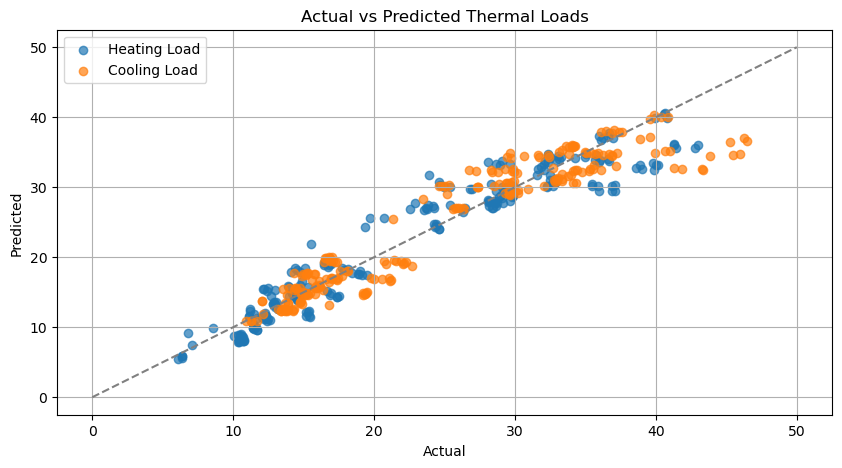

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test["Heating_Load"], y_pred[:, 0], label="Heating Load", alpha=0.7)
plt.scatter(y_test["Cooling_Load"], y_pred[:, 1], label="Cooling Load", alpha=0.7)
plt.plot([0, 50], [0, 50], color='gray', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Actual vs Predicted Thermal Loads")
plt.grid(True)
plt.show()